**OTT Industry Strategic Analysis**

**Objective of this project**

The goal of this project is to analyze the OTT streaming ecosystem by combining:
* Content library data (titles, genres, release years)
 * Subscriber growth data
* Revenue and profit data

I aim to understand:

* -->How the content release strategy affects subscriber growth
* -->Whether increases or declines in subscriptions correlate with content volume or quality
* -->How competitors differ in content strategy
* -->Whether pricing (ARPU) impacts subscriber trends
* -->The broader shift from traditional TV to streaming platforms

**Datasets Used**
The analysis uses publicly available datasets:
* -->Netflix titles dataset
* -->Amazon Prime titles dataset
* -->Hulu titles dataset
* -->Hotstar titles dataset
* -->Netflix subscriber data
* -->Netflix revenue & profit data
* -->Hulu subscriber & revenue data
* -->Regional streaming overview datasets

**Methodology Overview**
*   Standardized title datasets across platforms.
* Compared content library size and release frequency.
* Calculated subscriber growth rates using percentage change.
* Classified trends into Increase / Decrease / Stagnant.
* Analyzed correlation between content release volume and subscriber growth.
* Calculated ARPU (Revenue per Subscriber) to evaluate pricing efficiency.
* Compared OTT growth against traditional TV trends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os

import os




netflix = pd.read_csv("netflix_titles.csv")
prime = pd.read_csv("amazon_prime_titles.csv")
hotstar = pd.read_csv("hotstar.csv")
hulu = pd.read_csv("hulu_titles.csv")

print("Files loaded successfully")


print("Fils loaded successfully")





Files loaded successfully
Fils loaded successfully


In [2]:
import os
print(os.getcwd())


/Users/vihaans/Desktop/da_1


In [3]:
# Loadin the OTT titles
netflix = pd.read_csv("netflix_titles.csv")
prime = pd.read_csv("amazon_prime_titles.csv")
hotstar = pd.read_csv("hotstar.csv")
hulu = pd.read_csv("hulu_titles.csv")


print("Netflix:", netflix.shape)
print("Prime:", prime.shape)
print("Hotstar:", hotstar.shape)
print("Hulu:", hulu.shape)


Netflix: (8807, 12)
Prime: (9668, 12)
Hotstar: (6874, 10)
Hulu: (3073, 12)


In [4]:
# Netflix Business Data
netflix_subs = pd.read_csv('Netflix/NumSubscribers.csv')
netflix_revenue = pd.read_csv('Netflix/Revenue.csv')
netflix_profit = pd.read_csv('Netflix/Profit.csv')

# Hulu Business Data
hulu_subs = pd.read_csv('Hulu/NumSubscribers.csv')
hulu_revenue = pd.read_csv('Hulu/Revenue.csv')

print("Netflix Subscribers Data:", netflix_subs.shape)
print("Netflix Revenue Data:", netflix_revenue.shape)
print("Hulu Subscribers Data:", hulu_subs.shape)


Netflix Subscribers Data: (10, 2)
Netflix Revenue Data: (10, 2)
Hulu Subscribers Data: (11, 2)


In [5]:
netflix_subs.head()


,Year,Subscribers
0,2011,21.5
1,2012,25.7
2,2013,35.6
3,2014,47.9
4,2015,62.7


## Ideas:
1. Competitors analystics
2. Any result, look at causes -> Inc/Dec subscriptions
3. if inc, look at recent movies with very good ratings that are being released on netflix, analytics of other companies
4. if stagnant/dec, look at competitors and see the movies they are releasing for inc subs
5. optimal subscription payments and their rates wrt other companies
6. Traditional TV and its possible downfall


Combined dataset shape: (28422, 19)


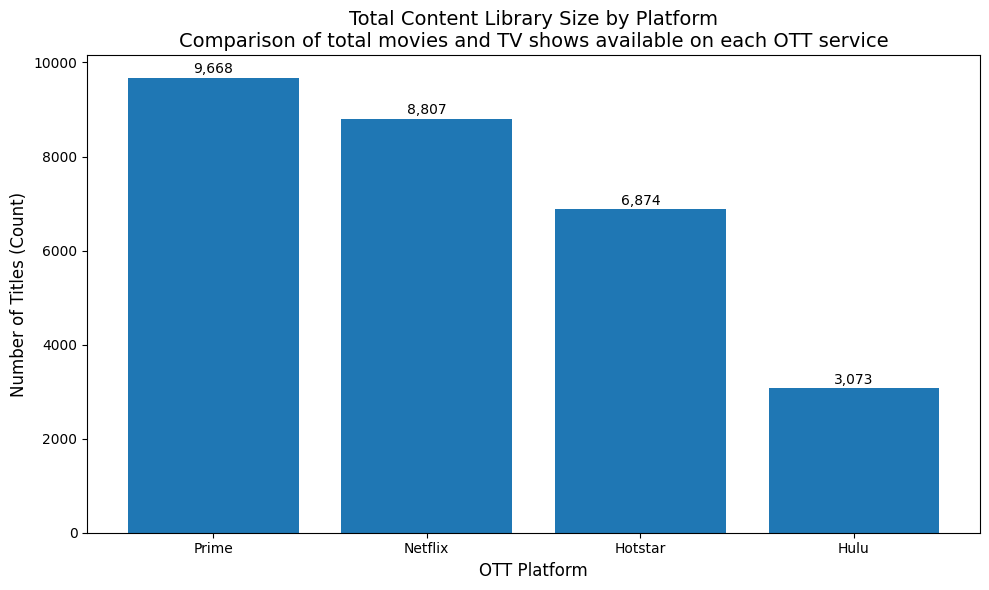

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
# Load datasets
netflix = pd.read_csv("netflix_titles.csv")
hulu = pd.read_csv("hulu_titles.csv")
prime = pd.read_csv("amazon_prime_titles.csv")
hotstar = pd.read_csv("hotstar.csv")

# Cleaning function
def clean_titles(df, provider):
    df = df.copy()
    df.columns = df.columns.str.lower()
    df['provider'] = provider

    if 'release_year' not in df.columns and 'year' in df.columns:
        df = df.rename(columns={'year': 'release_year'})

    if 'listed_in' not in df.columns and 'genres' in df.columns:
        df = df.rename(columns={'genres': 'listed_in'})

    return df

# Apply cleaning
netflix_c = clean_titles(netflix, "Netflix")
prime_c = clean_titles(prime, "Prime")
hotstar_c = clean_titles(hotstar, "Hotstar")
hulu_c = clean_titles(hulu, "Hulu")

# Combine
combined_titles = pd.concat(
    [netflix_c, prime_c, hotstar_c, hulu_c],
    ignore_index=True
)

print("Combined dataset shape:", combined_titles.shape)


# Count titles per platform
provider_counts = combined_titles['provider'].value_counts()

plt.figure(figsize=(10,6))
bars = plt.bar(provider_counts.index, provider_counts.values)

# Axis Labels
plt.xlabel("OTT Platform", fontsize=12)
plt.ylabel("Number of Titles (Count)", fontsize=12)

# Title + Description
plt.title("Total Content Library Size by Platform\n"
          "Comparison of total movies and TV shows available on each OTT service",
          fontsize=14)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 100,
             f"{int(height):,}",
             ha='center',
             fontsize=10)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



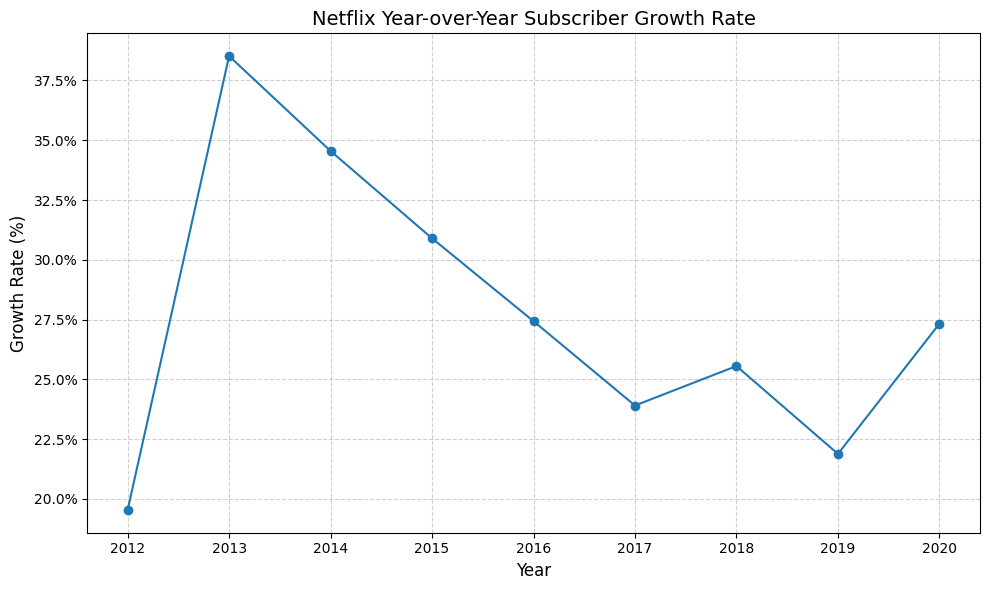

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

netflix_subs['growth'] = netflix_subs['Subscribers'].pct_change()

plt.figure(figsize=(10,6))

# Use Year if available, otherwise index
if 'Year' in netflix_subs.columns:
    x_values = netflix_subs['Year']
else:
    x_values = netflix_subs.index

plt.plot(x_values, netflix_subs['growth'], marker='o')

plt.title("Netflix Year-over-Year Subscriber Growth Rate", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Growth Rate (%)", fontsize=12)

# Convert decimal to percentage display
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [8]:
netflix_releases = netflix_c.groupby('release_year').size().reset_index(name='release_count')

analysis = pd.merge(netflix_subs, 
                    netflix_releases, 
                    left_on='Year', 
                    right_on='release_year', 
                    how='left')


In [9]:
analysis.head()



,Year,Subscribers,growth,release_year,release_count
0,2011,21.5,NaN,2011,185
1,2012,25.7,0.195349,2012,237
2,2013,35.6,0.385214,2013,288
3,2014,47.9,0.345506,2014,352
4,2015,62.7,0.308977,2015,560


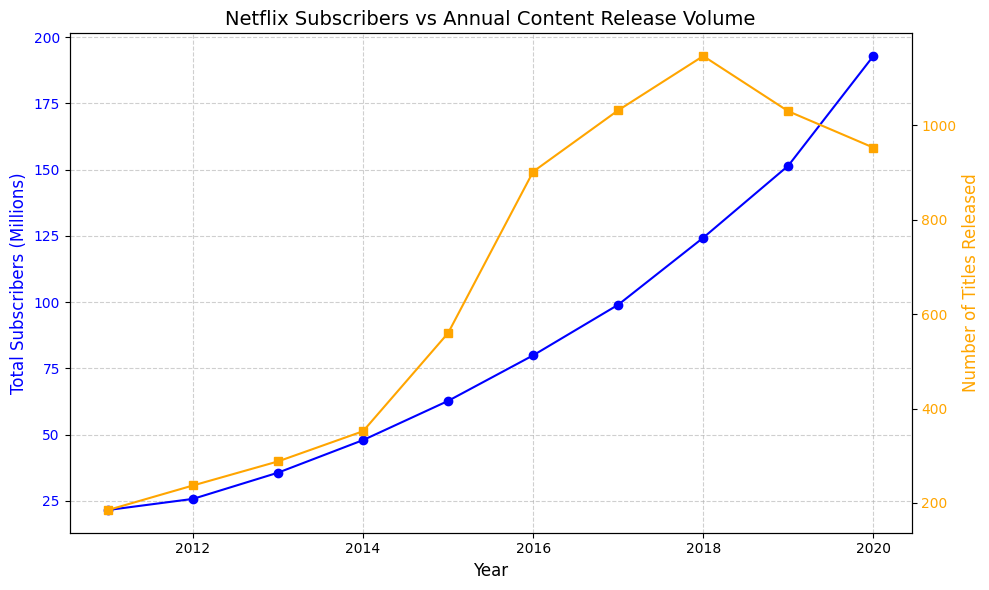

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax1 = plt.subplots(figsize=(10,6))

# X-axis
x = analysis['Year']

# --- First Y-axis (Subscribers) ---
ax1.plot(x, analysis['Subscribers'], color='blue', marker='o', label='Subscribers')
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Total Subscribers (Millions)", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# --- Second Y-axis (Release Count) ---
ax2 = ax1.twinx()
ax2.plot(x, analysis['release_count'], color='orange', marker='s', label='Release Count')
ax2.set_ylabel("Number of Titles Released", fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title
plt.title("Netflix Subscribers vs Annual Content Release Volume", fontsize=14)

# Grid
ax1.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [11]:
def prepare_platform(df, name):
    df = df.copy()
    df.columns = df.columns.str.lower()
    df['provider'] = name
    return df

netflix_c = prepare_platform(netflix, "Netflix")
prime_c = prepare_platform(prime, "Prime")
hulu_c = prepare_platform(hulu, "Hulu")

# If Disney dataset exists:
# disney_c = prepare_platform(disney, "Disney")

combined_titles = pd.concat([netflix_c, prime_c, hulu_c], ignore_index=True)

combined_titles['type'] = combined_titles['type'].fillna("Unknown")



Netflix and Prime have a larger overall content library compared to Hulu.
TV Shows dominate on Netflix, while Prime shows a relatively balanced distribution.
Content strategy differs across platforms, reflecting target audience positioning.



In [12]:
print(hotstar.columns)

def prepare_release_analysis(df):
    df = df.copy()
    
    # Handle different year column names
    if 'release_year' in df.columns:
        year_col = 'release_year'
    elif 'year' in df.columns:
        year_col = 'year'
    else:
        raise ValueError("No year column found in dataset")

    df[year_col] = pd.to_numeric(df[year_col], errors='coerce')
    df = df.dropna(subset=[year_col])

    yearly = df.groupby(year_col).size().reset_index(name='release_count')
    yearly = yearly.rename(columns={year_col: 'Year'})

    return yearly


Index(['hotstar_id', 'title', 'description', 'genre', 'year', 'age_rating',
       'running_time', 'seasons', 'episodes', 'type'],
      dtype='object')


In [13]:
netflix_release = prepare_release_analysis(netflix)
prime_release = prepare_release_analysis(prime)
hotstar_release = prepare_release_analysis(hotstar)
hulu_release = prepare_release_analysis(hulu)

print(hotstar.columns)

Index(['hotstar_id', 'title', 'description', 'genre', 'year', 'age_rating',
       'running_time', 'seasons', 'episodes', 'type'],
      dtype='object')


In [14]:
def prepare_platform(df, name):
    df = df.copy()
    df.columns = df.columns.str.lower()
    df['provider'] = name
    
    if 'type' not in df.columns:
        df['type'] = "Unknown"
        
    return df[['type','provider']]


netflix_c = prepare_platform(netflix, "Netflix")
prime_c = prepare_platform(prime, "Prime")
hulu_c = prepare_platform(hulu, "Hulu")
hotstar_c = prepare_platform(hotstar, "Hotstar")

# Only if you have Disney titles dataset:
# disney_c = prepare_platform(disney, "Disney+")

combined_titles = pd.concat(
    [netflix_c, prime_c, hulu_c, hotstar_c],
    ignore_index=True
)

combined_titles['type'] = combined_titles['type'].str.strip()
combined_titles['type'] = combined_titles['type'].replace({
    'TV Show': 'TV Show',
    'TV Shows': 'TV Show',
    'Movie': 'Movie',
    'Movies': 'Movie'
})



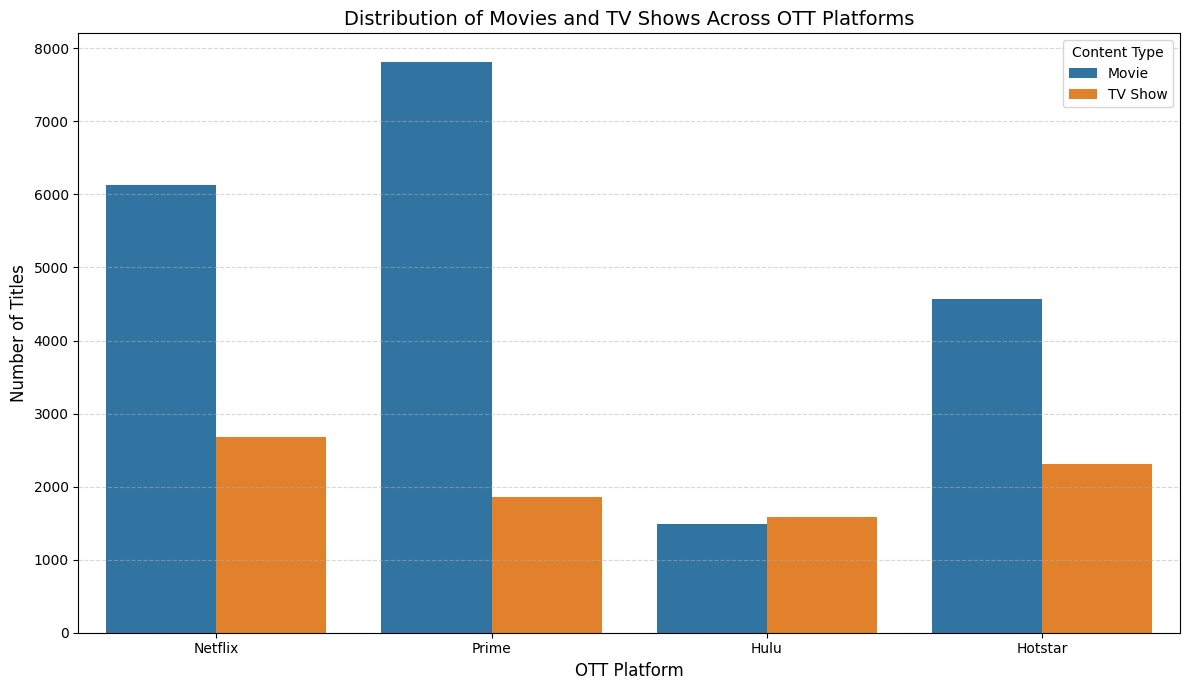

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
combined_titles['type'] = combined_titles['type'].str.strip().str.lower()

combined_titles['type'] = combined_titles['type'].replace({
    'movie': 'Movie',
    'movies': 'Movie',
    'tv show': 'TV Show',
    'tv shows': 'TV Show',
    'tv': 'TV Show'
})


plt.figure(figsize=(12,7))

sns.countplot(
    data=combined_titles,
    x='provider',
    hue='type'
)

plt.title("Distribution of Movies and TV Shows Across OTT Platforms", fontsize=14)
plt.xlabel("OTT Platform", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)

plt.legend(title="Content Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [16]:
netflix_revenue = pd.read_csv('/kaggle/input/movies-titles/archive/Netflix/Revenue.csv')

pricing_analysis = pd.merge(netflix_subs, netflix_revenue, on='Year')

pricing_analysis['ARPU'] = pricing_analysis['Revenue'] / pricing_analysis['Subscribers']

pricing_analysis[['Year','ARPU']]


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/movies-titles/archive/Netflix/Revenue.csv'

In [17]:
print("Dataset Shape:", df.shape)

print("\nColumn Names:")
print(df.columns)

print("\nDataset Info:")
df.info()


NameError: name 'df' is not defined

In [18]:
df.isnull().sum().sort_values(ascending=False)


NameError: name 'df' is not defined

In [19]:
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['rating'] = df['rating'].fillna('Not Rated')

df = df.dropna(subset=['date_added'])

df.isnull().sum()


NameError: name 'df' is not defined

In [20]:
import matplotlib.pyplot as plt

def plot_release_trend(df, platform_name):
    
    # Count releases per year
    yearly_counts = df['release_year'].value_counts().sort_index()
    
    plt.figure(figsize=(10,6))
    plt.plot(yearly_counts.index, yearly_counts.values, 
             marker='o', linewidth=2)
    
    # Titles
    plt.title(f"{platform_name} - Annual Content Release Trend", fontsize=14)
    
    # Axis labels with units
    plt.xlabel("Release Year (Calendar Year)", fontsize=12)
    plt.ylabel("Number of Titles Released (Count per Year)", fontsize=12)
    
    # Improve ticks
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()


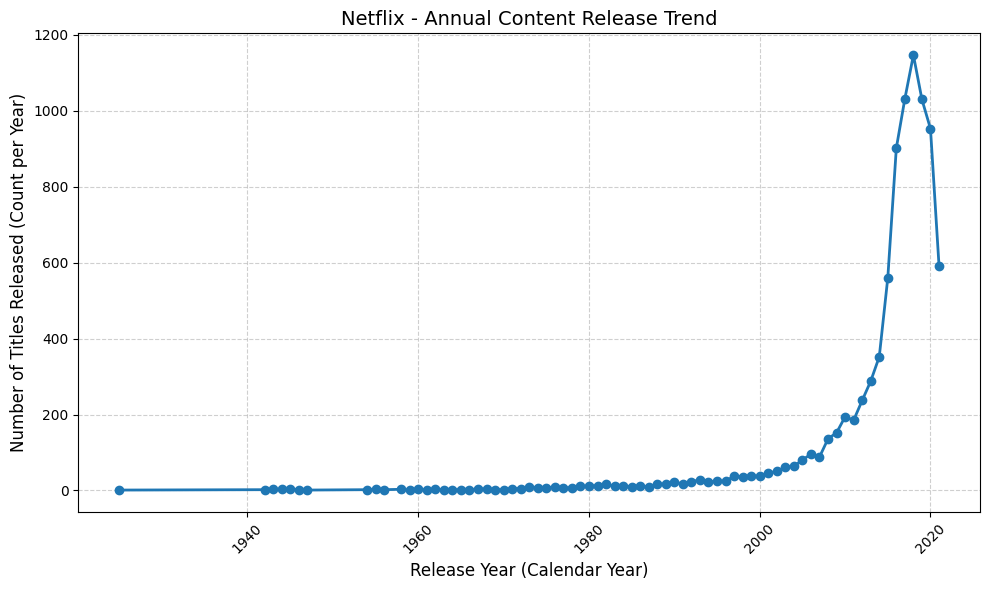

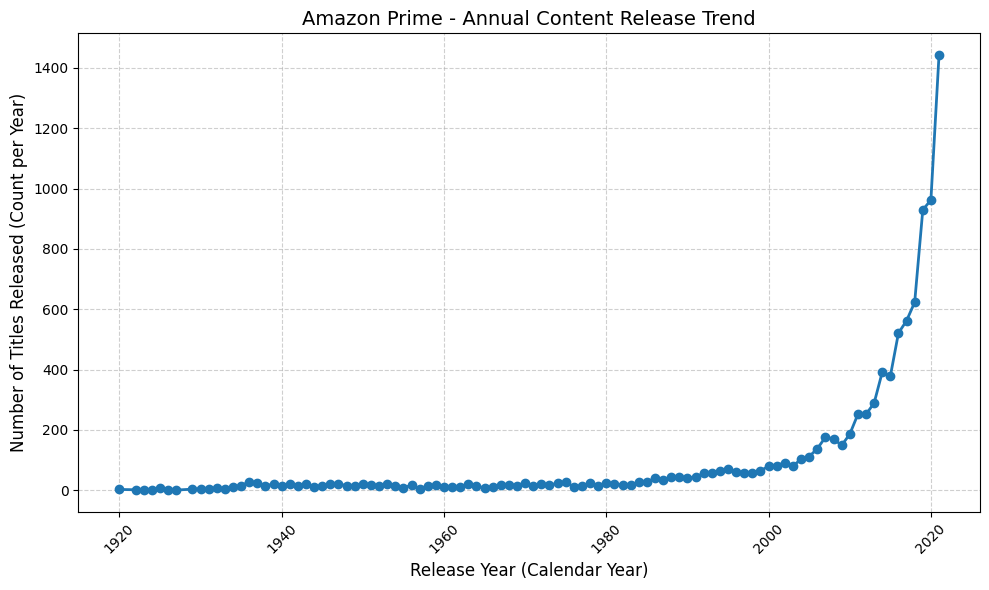

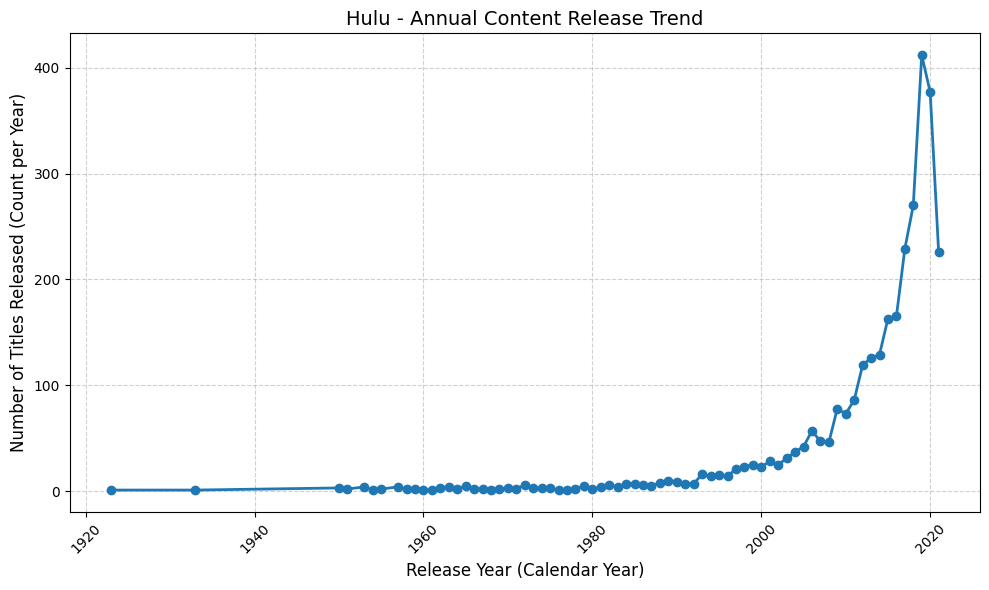

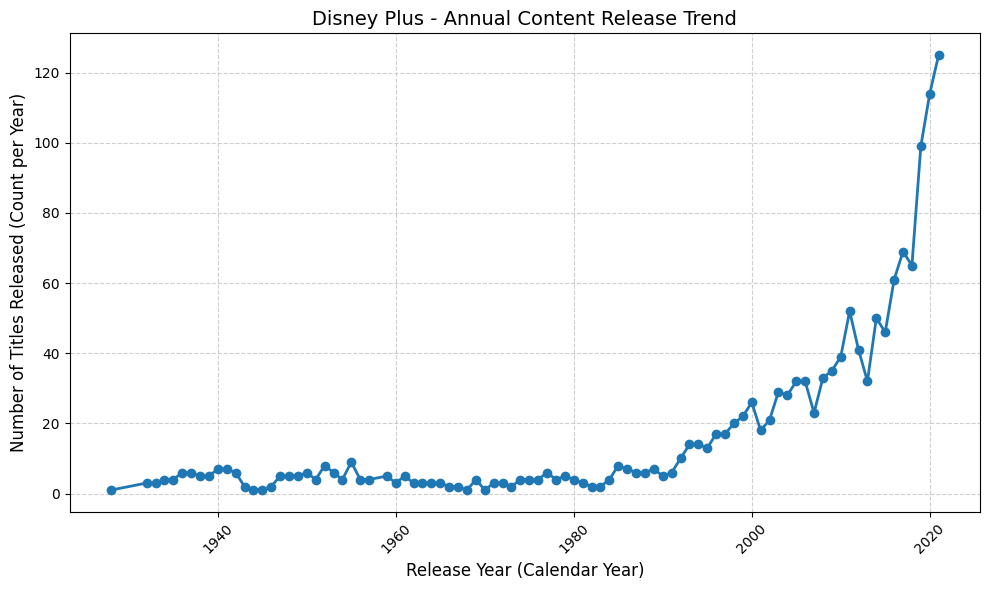

In [21]:
netflix_df = pd.read_csv("netflix_titles.csv")
prime_df = pd.read_csv("amazon_prime_titles.csv")
hulu_df = pd.read_csv("hulu_titles.csv")
disney_df = pd.read_csv("disney_plus_titles.csv")

plot_release_trend(netflix_df, "Netflix")
plot_release_trend(prime_df, "Amazon Prime")
plot_release_trend(hulu_df, "Hulu")
plot_release_trend(disney_df, "Disney Plus")


In [22]:
# Clean country column
netflix_clean = netflix.copy()

netflix_clean['country'] = netflix_clean['country'].fillna("Unknown")

# Split multiple countries
netflix_clean = netflix_clean.assign(
    country=netflix_clean['country'].str.split(',')
).explode('country')

# Remove extra spaces
netflix_clean['country'] = netflix_clean['country'].str.strip()

# Remove Unknown
netflix_clean = netflix_clean[netflix_clean['country'] != "Unknown"]

top_countries = (
    netflix_clean['country']
    .value_counts()
    .head(10)
)


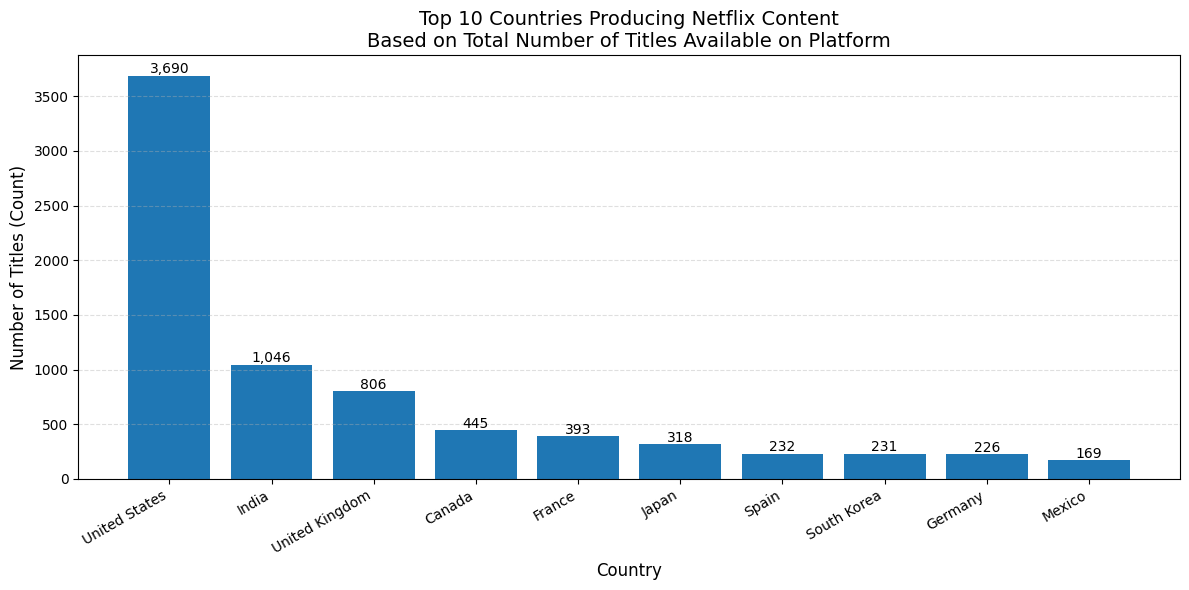

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

bars = plt.bar(top_countries.index, top_countries.values)

# Title
plt.title(
    "Top 10 Countries Producing Netflix Content\n"
    "Based on Total Number of Titles Available on Platform",
    fontsize=14
)

# Axis labels
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Titles (Count)", fontsize=12)

# Rotate labels neatly
plt.xticks(rotation=30, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 20,
        f"{int(height):,}",
        ha='center',
        fontsize=10
    )

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [24]:
# Clean listed_in column
genre_df = netflix.copy()


genre_df['listed_in'] = genre_df['listed_in'].fillna("Unknown")

# Split multiple genres
genre_df = genre_df.assign(
    listed_in=genre_df['listed_in'].str.split(',')
).explode('listed_in')

# Strip extra spaces
genre_df['listed_in'] = genre_df['listed_in'].str.strip()

# Remove Unknown if present
genre_df = genre_df[genre_df['listed_in'] != "Unknown"]

top_genres = (
    genre_df['listed_in']
    .value_counts()
    .head(10)
)


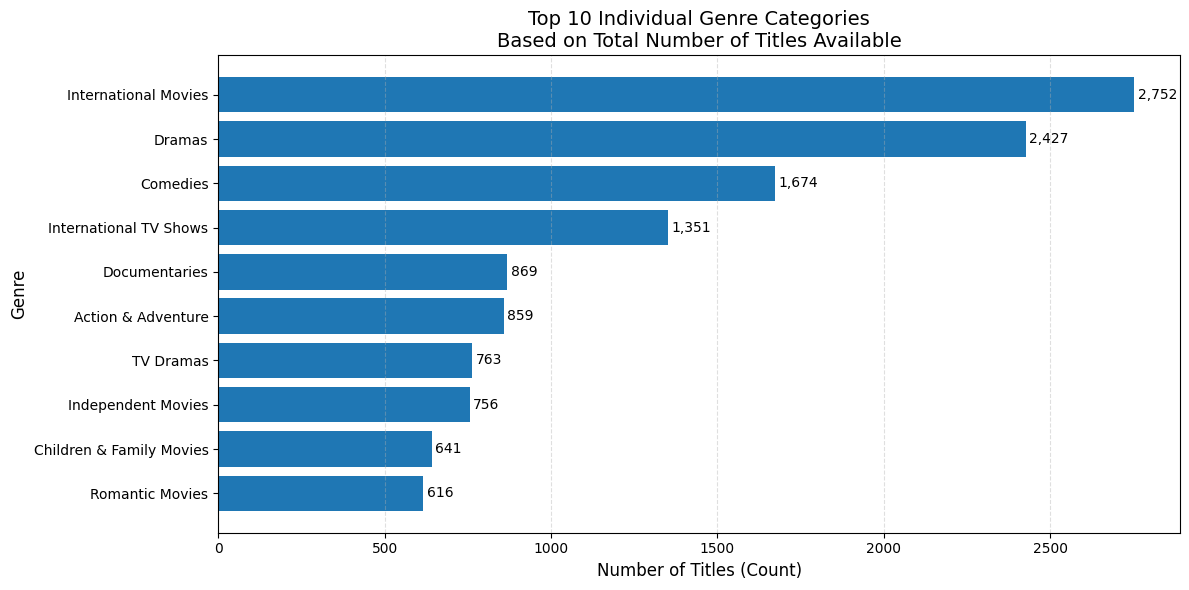

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

bars = plt.barh(top_genres.index, top_genres.values)

# Title
plt.title(
    "Top 10 Individual Genre Categories\n"
    "Based on Total Number of Titles Available",
    fontsize=14
)

# Axis labels
plt.xlabel("Number of Titles (Count)", fontsize=12)
plt.ylabel("Genre", fontsize=12)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 10,
        bar.get_y() + bar.get_height()/2,
        f"{int(width):,}",
        va='center',
        fontsize=10
    )

plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [26]:
# Standardize column names for all datasets
for df in [netflix, prime, hulu, hotstar]:
    df.columns = df.columns.str.lower().str.strip()


In [27]:
def prepare_release_analysis(df):
    df = df.copy()
    
    # Check which year column exists
    if 'release_year' in df.columns:
        year_col = 'release_year'
    elif 'year' in df.columns:
        year_col = 'year'
    else:
        print("Year column not found in dataset")
        print("Available columns:", df.columns)
        return None
    
    df[year_col] = pd.to_numeric(df[year_col], errors='coerce')
    df = df.dropna(subset=[year_col])
    
    yearly = (
        df.groupby(year_col)
        .size()
        .reset_index(name='release_count')
        .rename(columns={year_col: 'Year'})
        .sort_values('Year')
    )
    
    return yearly


netflix_release = prepare_release_analysis(netflix)
hulu_release = prepare_release_analysis(hulu)
prime_release = prepare_release_analysis(prime)
hotstar_release = prepare_release_analysis(hotstar)


print(netflix_release.head())
print(prime_release.head())
print(hulu_release.head())
print(hotstar_release.head())





   Year  release_count
0  1925              1
1  1942              2
2  1943              3
3  1944              3
4  1945              4
   Year  release_count
0  1920              3
1  1922              2
2  1923              1
3  1924              1
4  1925              8
   Year  release_count
0  1923              1
1  1933              1
2  1950              3
3  1951              2
4  1953              4
   Year  release_count
0  1928              1
1  1937              1
2  1940              2
3  1941              5
4  1942              1


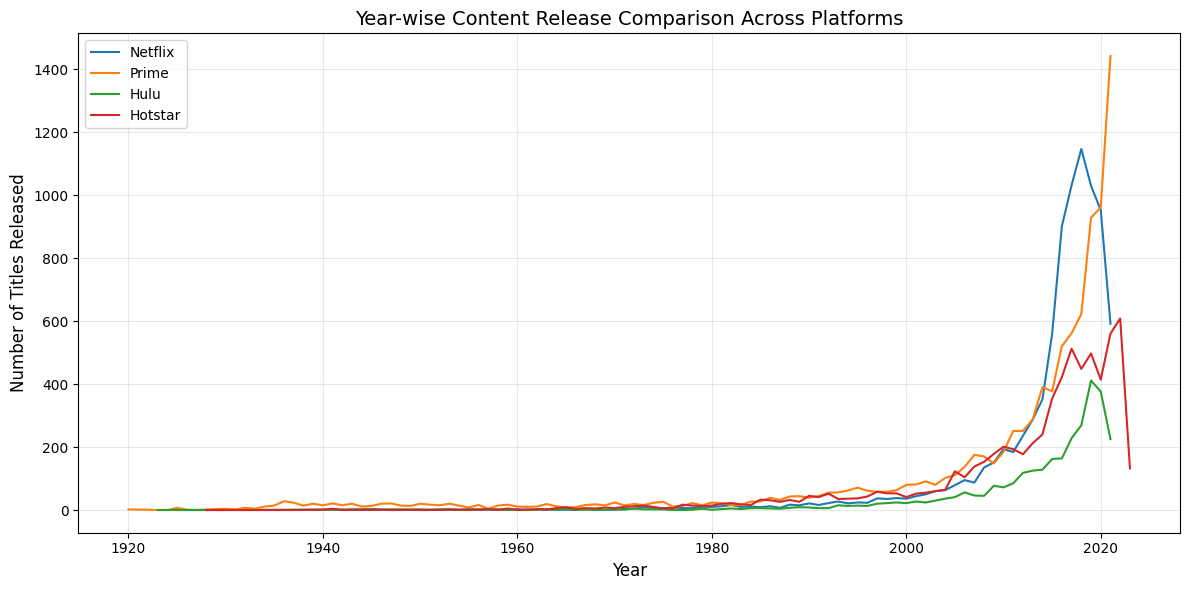

In [28]:
plt.figure(figsize=(12,6))

plt.plot(netflix_release['Year'], netflix_release['release_count'], label='Netflix')
plt.plot(prime_release['Year'], prime_release['release_count'], label='Prime')
plt.plot(hulu_release['Year'], hulu_release['release_count'], label='Hulu')
plt.plot(hotstar_release['Year'], hotstar_release['release_count'], label='Hotstar')

plt.title("Year-wise Content Release Comparison Across Platforms", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles Released", fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
